# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

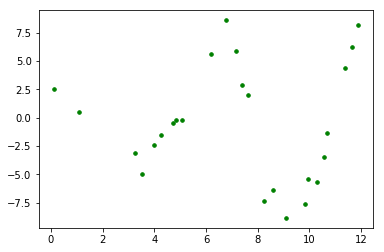

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

In [36]:
from sklearn.preprocessing import PolynomialFeatures
X = x.reshape(-1,1)
x_2 = X**2

# poly = PolynomialFeatures(2)
# X_2 = poly.fit_transform(X)

print(X)
print(x_2)

[[ 0.12121212]
 [ 1.09090909]
 [ 3.27272727]
 [ 3.51515152]
 [ 4.        ]
 [ 4.24242424]
 [ 4.72727273]
 [ 4.84848485]
 [ 5.09090909]
 [ 6.18181818]
 [ 6.78787879]
 [ 7.15151515]
 [ 7.39393939]
 [ 7.63636364]
 [ 8.24242424]
 [ 8.60606061]
 [ 9.09090909]
 [ 9.81818182]
 [ 9.93939394]
 [10.3030303 ]
 [10.54545455]
 [10.66666667]
 [11.39393939]
 [11.63636364]
 [11.87878788]]
[[1.46923783e-02]
 [1.19008264e+00]
 [1.07107438e+01]
 [1.23562902e+01]
 [1.60000000e+01]
 [1.79981635e+01]
 [2.23471074e+01]
 [2.35078053e+01]
 [2.59173554e+01]
 [3.82148760e+01]
 [4.60752984e+01]
 [5.11441690e+01]
 [5.46703398e+01]
 [5.83140496e+01]
 [6.79375574e+01]
 [7.40642792e+01]
 [8.26446281e+01]
 [9.63966942e+01]
 [9.87915519e+01]
 [1.06152433e+02]
 [1.11206612e+02]
 [1.13777778e+02]
 [1.29821855e+02]
 [1.35404959e+02]
 [1.41105601e+02]]


## Solution

R2 result for straight line: 3.274412516052205e-05


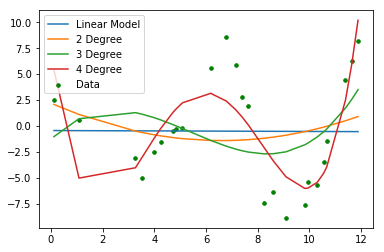

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg1 = LinearRegression().fit(X, y)
reg2 = 
plt.scatter(x, y, color='green', s=50, marker='.', label = "Data")
plt.plot(x, reg1.predict(X), label = "Linear Model")

X_smooth = np.linspace(0, 12, 100)

for degree in range(2, 5):
    poly = PolynomialFeatures(degree)
    poly_X = poly.fit_transform(X)
    reg_poly = LinearRegression().fit(poly_X, y)
    predict_X = reg_poly.predict(poly_X)
    plt.plot(X, predict_X, label="{} Degree".format(degree))

print("R2 result for straight line: {}".format(r2_score(y, reg1.predict(X))))
plt.legend()
plt.show()

## Summary

Great! You now know how to include polynomials in your linear model!